## Análisis de negocio – Campaña de diciembre (Bike Sales)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("./datasets/bikesales_clean.xlsx")

### 2. KPIs principales de la campaña de diciembre


In [14]:
kpi = {}

# Volumen
kpi["pedidos"] = df["sales_order"].count()
kpi["unidades_vendidas"] = df["order_quantity"].sum()

# Revenue y costes
kpi["revenue_total"] = df["revenue"].sum()
kpi["coste_total"] = df["cost"].sum()

# Beneficio y margen
kpi["beneficio_total"] = df["profit"].sum()
kpi["margen_porcentual"] = (df["profit"].sum() / df["revenue"].sum()) * 100
kpi["margen_medio_por_pedido"] = df["profit"].sum() / df["sales_order"].nunique()

# Ticket medio
kpi["ticket_medio"] = df["revenue"].mean()


# Tops
kpi["pais_top"] = df.groupby("country")["revenue"].sum().idxmax()
kpi["producto_top"] = df.groupby("product_description")["order_quantity"].sum().idxmax()
kpi

{'pedidos': np.int64(88),
 'unidades_vendidas': np.int64(186),
 'revenue_total': np.int64(360692),
 'coste_total': np.int64(197184),
 'beneficio_total': np.int64(163508),
 'margen_porcentual': np.float64(45.33175118938041),
 'margen_medio_por_pedido': np.float64(1879.4022988505747),
 'ticket_medio': np.float64(4098.772727272727),
 'pais_top': 'united states',
 'producto_top': 'mountain-200'}

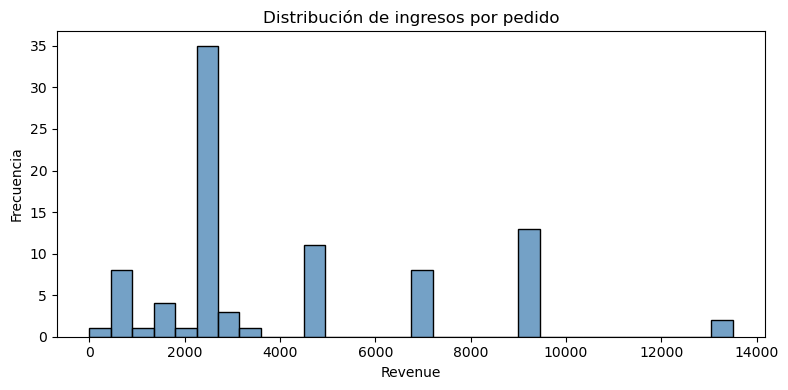

In [4]:
plt.figure(figsize=(8,4))
sns.histplot(
    data=df,
    x="revenue",
    bins=30,
    color="steelblue",
    edgecolor="black",
    alpha=0.75
)
plt.title("Distribución de ingresos por pedido", fontsize=12)
plt.xlabel("Revenue")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


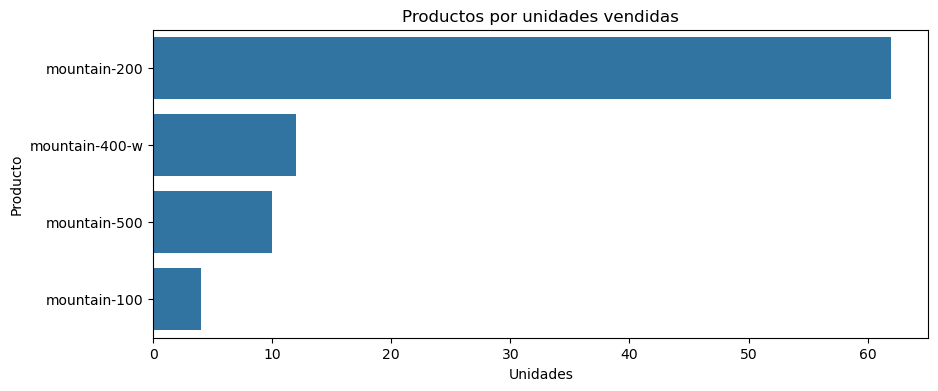

In [5]:
top_prod = df["product_description"].value_counts().nlargest()

plt.figure(figsize=(10,4))
sns.barplot(x=top_prod.values, y=top_prod.index)
plt.title("Productos por unidades vendidas")
plt.xlabel("Unidades")
plt.ylabel("Producto")
plt.show()


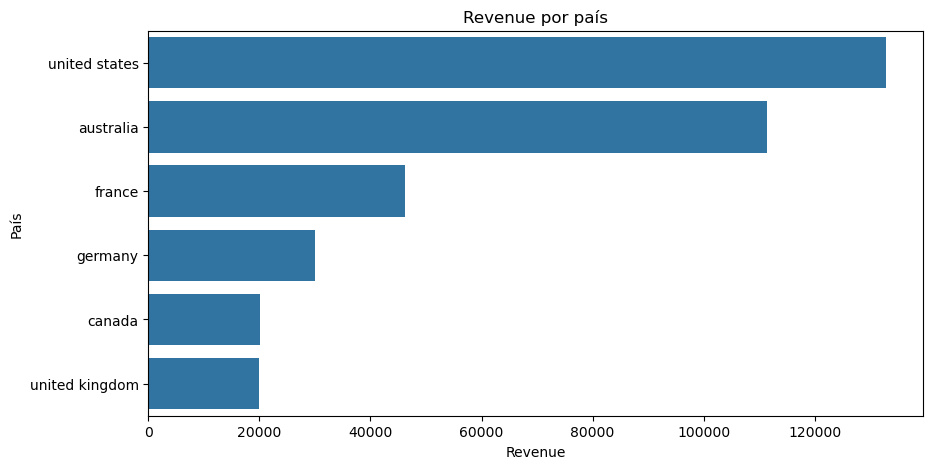

In [6]:
rev_country = df.groupby("country")["revenue"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=rev_country.values, y=rev_country.index)
plt.title("Revenue por país")
plt.xlabel("Revenue")
plt.ylabel("País")
plt.show()


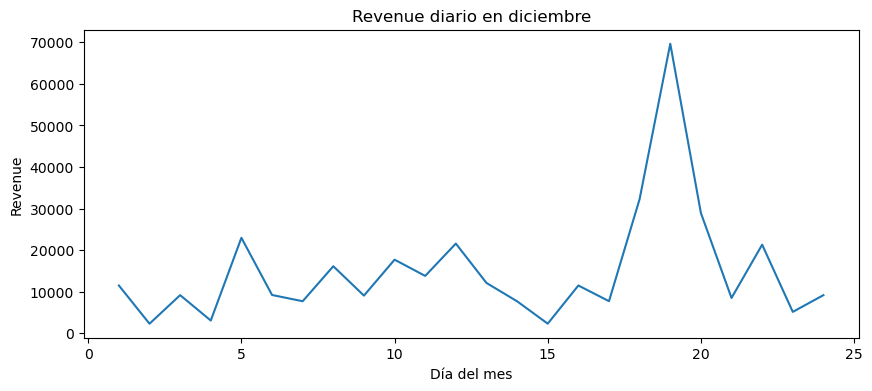

In [7]:
df["day"] = df["date"].dt.day

rev_day = df.groupby("day")["revenue"].sum()

plt.figure(figsize=(10,4))
sns.lineplot(x=rev_day.index, y=rev_day.values)
plt.title("Revenue diario en diciembre")
plt.xlabel("Día del mes")
plt.ylabel("Revenue")
plt.show()


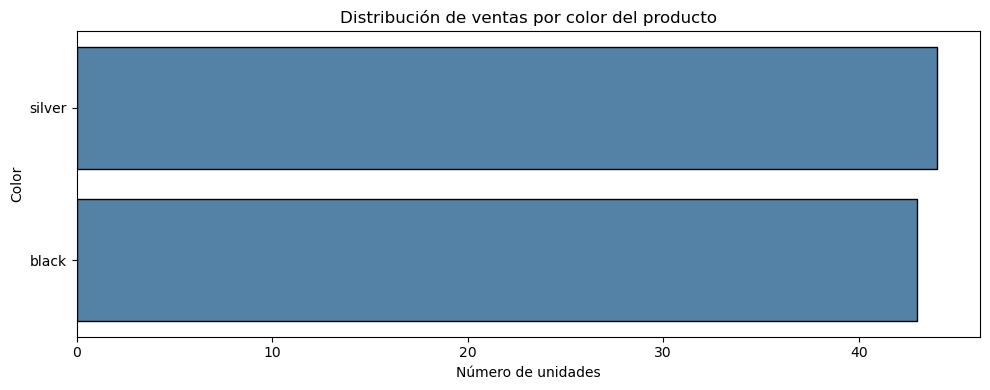

In [8]:
color_counts = df["product_color"].value_counts().head(10)

plt.figure(figsize=(10,4))
sns.barplot(
    x=color_counts.values,
    y=color_counts.index,
    color="steelblue",
    edgecolor="black"
)
plt.title("Distribución de ventas por color del producto")
plt.xlabel("Número de unidades")
plt.ylabel("Color")
plt.tight_layout()
plt.show()


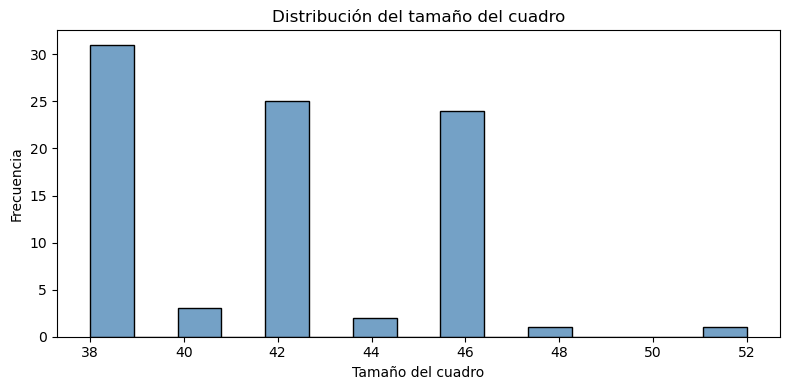

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(
    data=df,
    x="frame_size",
    bins=15,
    color="steelblue",
    edgecolor="black"
)
plt.title("Distribución del tamaño del cuadro")
plt.xlabel("Tamaño del cuadro")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


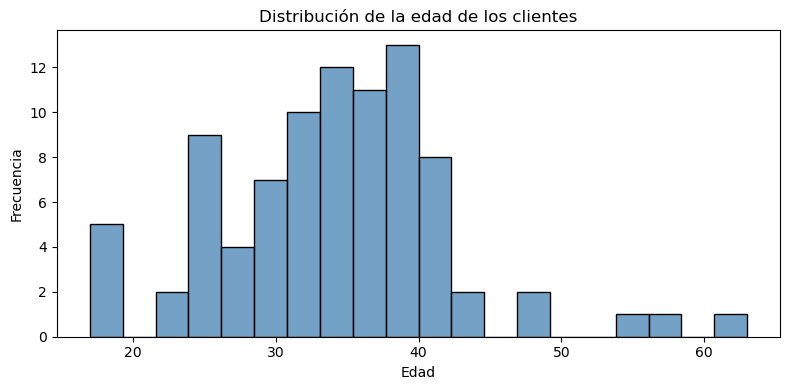

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(
    data=df,
    x="customer_age",
    bins=20,
    color="steelblue",
    edgecolor="black",
    alpha=0.75
)
plt.title("Distribución de la edad de los clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()
